<a href="https://colab.research.google.com/github/kiniv-21/Diabetes-Prediction-using-various-Machine-Learning-models/blob/main/Diabetes_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diabetes using the Pima Dataset from Kaggle
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline 
# sets the output of plotting commands inline

Importing Dataset

In [4]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# viewing dimensions of the dataframe
df.shape

(768, 9)

# Data Preprocessing

In [6]:
#Viewing Dataframe Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Since there are no null values, we can proceed further with visualisations

Text(0, 0.5, 'Count')

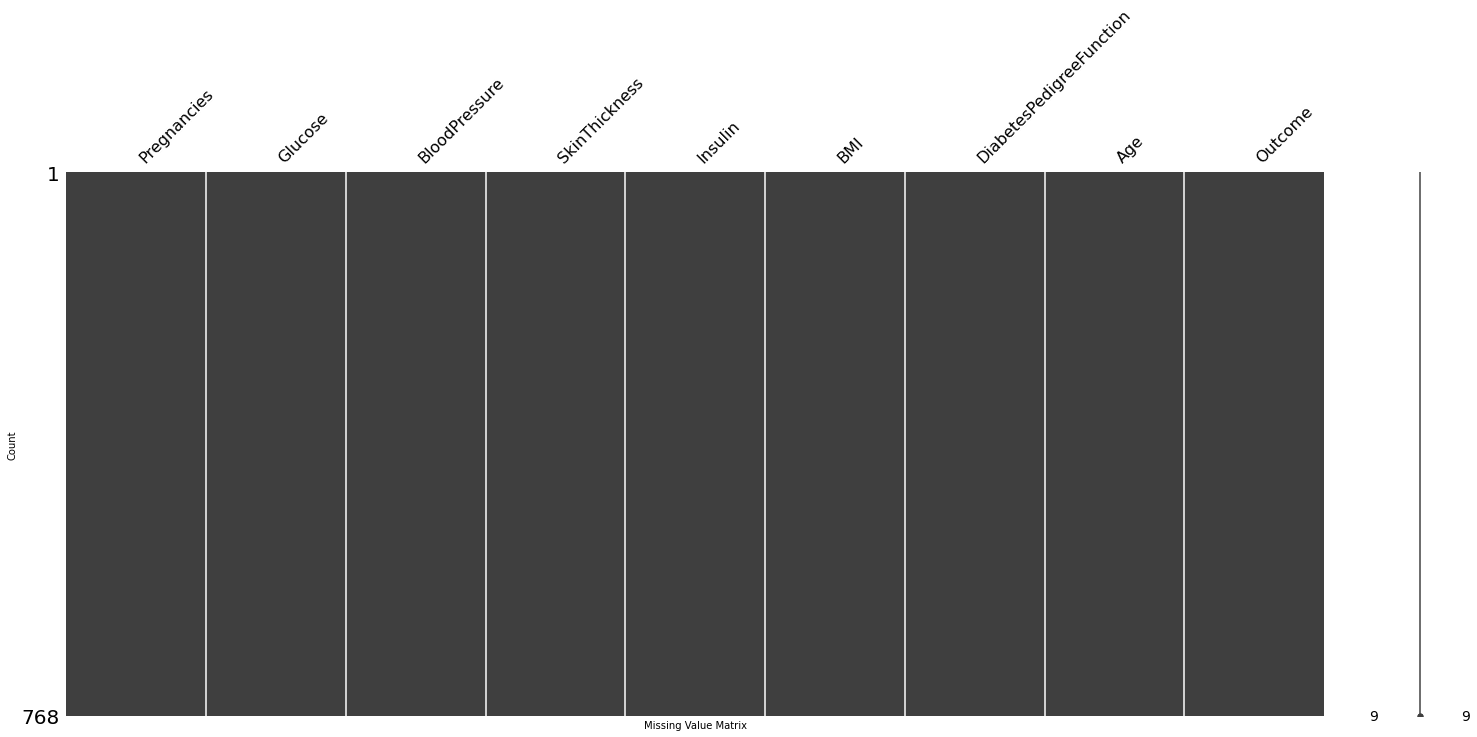

In [11]:
# Visualising missing data
import missingno as msno
msno.matrix(df)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

# Exploratory Data Analysis

Text(0.5, 1.0, 'Pregnancies')

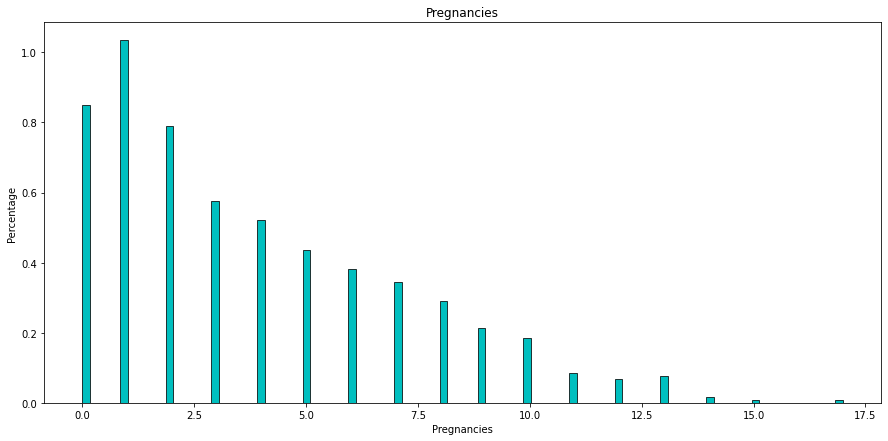

In [13]:
# Pregnencies
plt.figure(figsize=(15,7))
sns.histplot(df['Pregnancies'],facecolor = 'c', bins = 100, stat = 'density')
plt.ylabel("Percentage")
plt.title("Pregnancies")

Text(0.5, 1.0, 'Glucose')

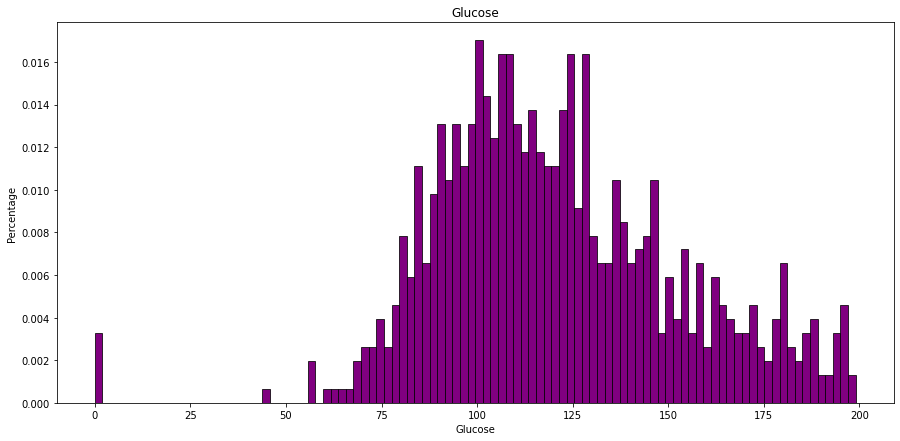

In [14]:
 # Glucose
 plt.figure(figsize=(15,7))
sns.histplot(df['Glucose'],facecolor = 'purple', bins = 100, stat = 'density')
plt.ylabel("Percentage")
plt.title("Glucose")

Text(0.5, 1.0, 'BloodPressure')

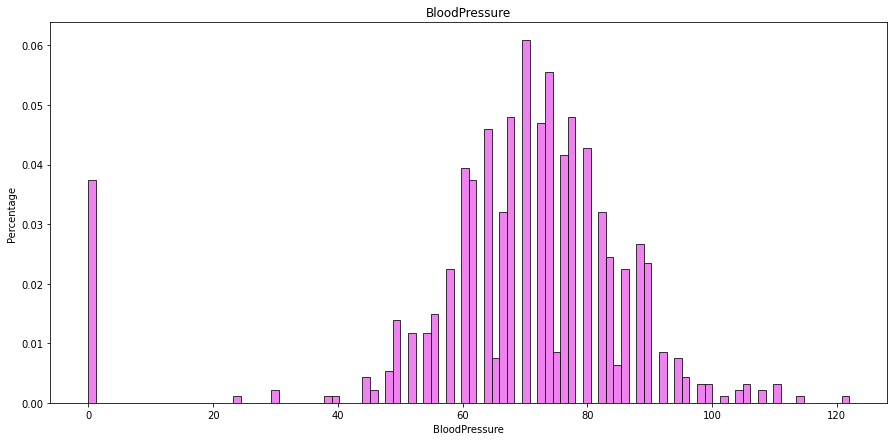

In [16]:
# BloodPressure
plt.figure(figsize=(15,7))
sns.histplot(df['BloodPressure'],facecolor = 'violet', bins = 100, stat = 'density')
plt.ylabel("Percentage")
plt.title("BloodPressure")

Text(0.5, 1.0, 'SkinThickness')

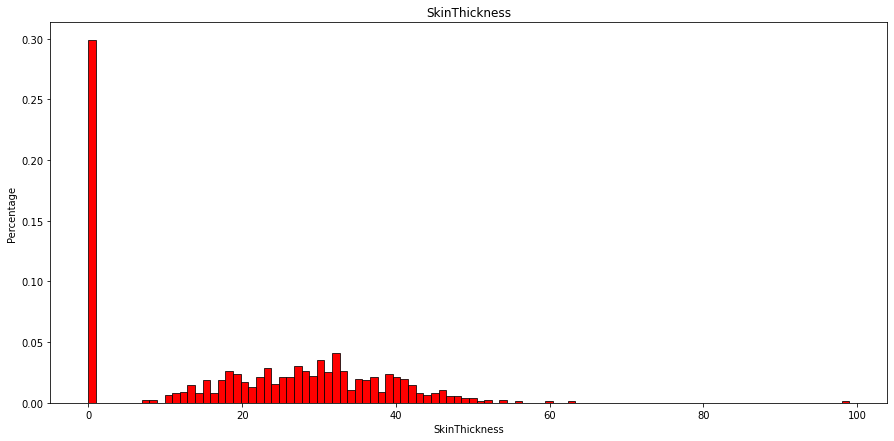

In [17]:
# SkinThickness
plt.figure(figsize=(15,7))
sns.histplot(df['SkinThickness'],facecolor = 'red', bins = 100, stat = 'density')
plt.ylabel("Percentage")
plt.title("SkinThickness")

# Visualizing Target Variable

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff362cb1730>],
      dtype=object)

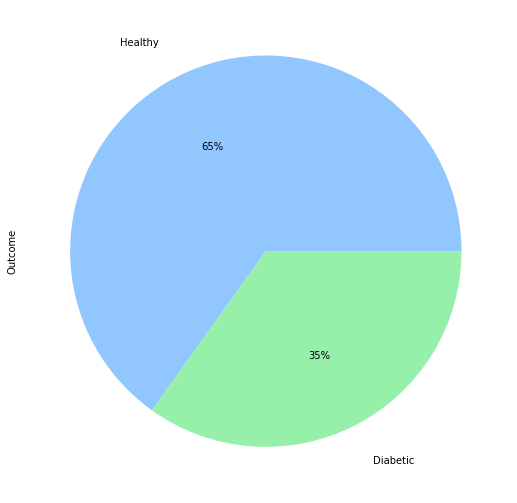

In [18]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy","Diabetic"]
df['Outcome'].value_counts().plot(kind = 'pie', labels = labels, subplots = True, autopct = '%1.0f%%', labeldistance = 1.2, figsize = (9,9))

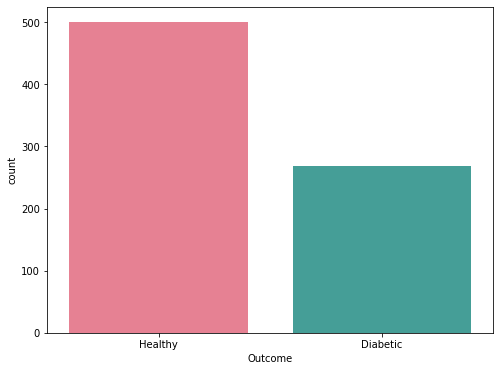

In [20]:
from matplotlib.pyplot import figure, show
figure(figsize = (8,6))
ax = sns.countplot(x=df['Outcome'], data = df, palette = 'husl')
ax.set_xticklabels(['Healthy','Diabetic'])
healthy, diabetics = df['Outcome'].value_counts().values


# Distribution of other Features w.r.t Outcome

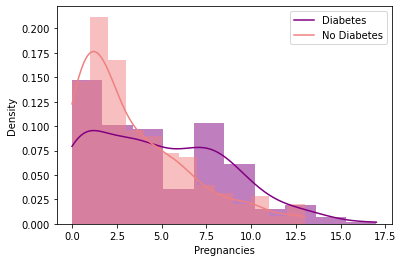

In [24]:
# Pregnancies
plt.figure()
ax = sns.histplot(df['Pregnancies'][df.Outcome == 1], color = "purple", kde = True, stat = 'density', linewidth = 0)
sns.histplot(df['Pregnancies'][df.Outcome == 0], color = 'lightcoral', kde = True, stat = "density", linewidth = 0)
plt.legend(['Diabetes','No Diabetes'])

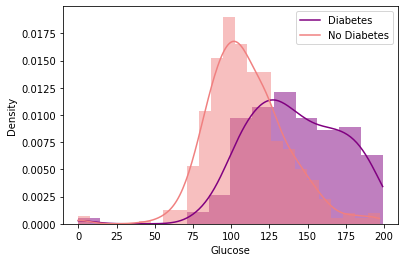

In [25]:
# Glucose
plt.figure()
ax = sns.histplot(df['Glucose'][df.Outcome == 1], color = "purple", kde = True, stat = 'density', linewidth = 0)
sns.histplot(df['Glucose'][df.Outcome == 0], color = 'lightcoral', kde = True, stat = "density", linewidth = 0)
plt.legend(['Diabetes','No Diabetes'])

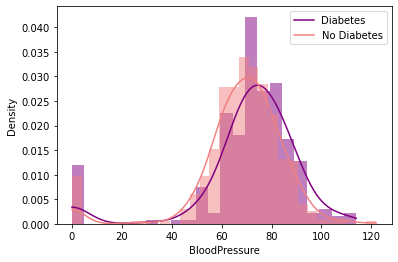

In [26]:
# BloodPressure
plt.figure()
ax = sns.histplot(df['BloodPressure'][df.Outcome == 1], color = "purple", kde = True, stat = 'density', linewidth = 0)
sns.histplot(df['BloodPressure'][df.Outcome == 0], color = 'lightcoral', kde = True, stat = "density", linewidth = 0)
plt.legend(['Diabetes','No Diabetes'])

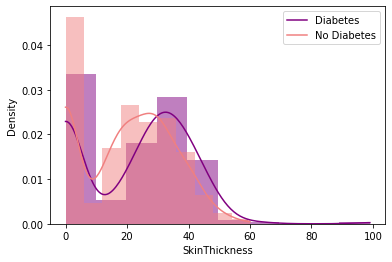

In [27]:
# SkinThickness
plt.figure()
ax = sns.histplot(df['SkinThickness'][df.Outcome == 1], color = "purple", kde = True, stat = 'density', linewidth = 0)
sns.histplot(df['SkinThickness'][df.Outcome == 0], color = 'lightcoral', kde = True, stat = "density", linewidth = 0)
plt.legend(['Diabetes','No Diabetes'])

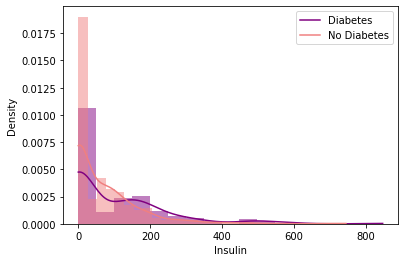

In [28]:
# Insulin
plt.figure()
ax = sns.histplot(df['Insulin'][df.Outcome == 1], color = "purple", kde = True, stat = 'density', linewidth = 0)
sns.histplot(df['Insulin'][df.Outcome == 0], color = 'lightcoral', kde = True, stat = "density", linewidth = 0)
plt.legend(['Diabetes','No Diabetes'])

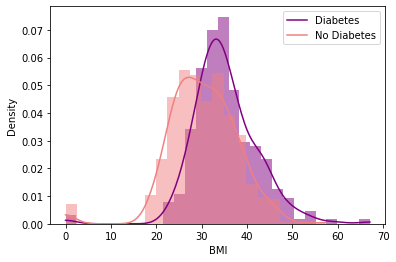

In [29]:
# BMI
plt.figure()
ax = sns.histplot(df['BMI'][df.Outcome == 1], color = "purple", kde = True, stat = 'density', linewidth = 0)
sns.histplot(df['BMI'][df.Outcome == 0], color = 'lightcoral', kde = True, stat = "density", linewidth = 0)
plt.legend(['Diabetes','No Diabetes'])

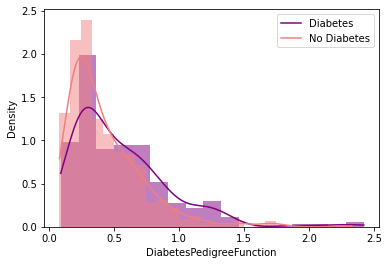

In [30]:
# DiabetesPedigreeFunction
plt.figure()
ax = sns.histplot(df['DiabetesPedigreeFunction'][df.Outcome == 1], color = "purple", kde = True, stat = 'density', linewidth = 0)
sns.histplot(df['DiabetesPedigreeFunction'][df.Outcome == 0], color = 'lightcoral', kde = True, stat = "density", linewidth = 0)
plt.legend(['Diabetes','No Diabetes'])

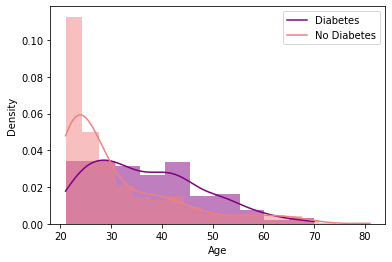

In [31]:
# Age
plt.figure()
ax = sns.histplot(df['Age'][df.Outcome == 1], color = "purple", kde = True, stat = 'density', linewidth = 0)
sns.histplot(df['Age'][df.Outcome == 0], color = 'lightcoral', kde = True, stat = "density", linewidth = 0)
plt.legend(['Diabetes','No Diabetes'])

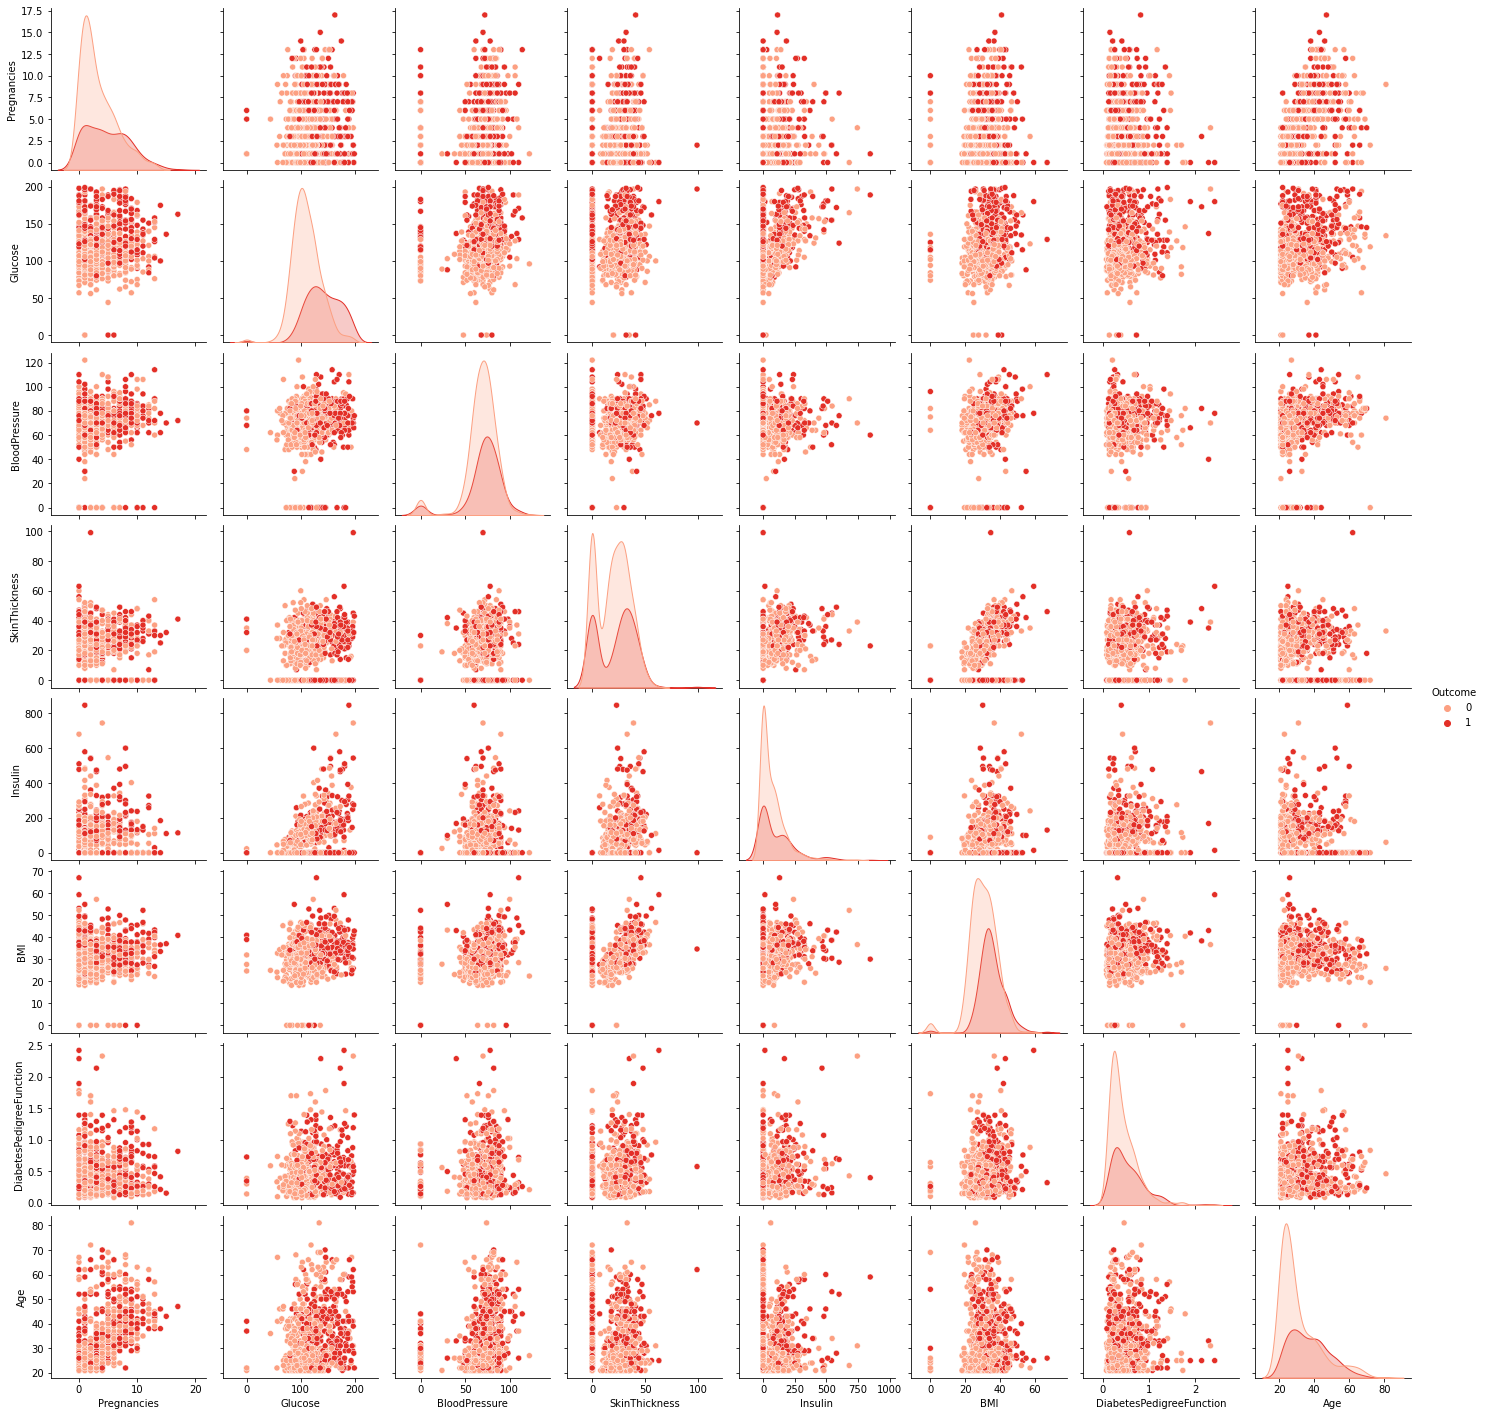

In [33]:
sns.pairplot(df,hue = "Outcome", palette = "Reds")

# Finding Correlation between the columns

Text(0.5, 1.0, 'Correlation Map')

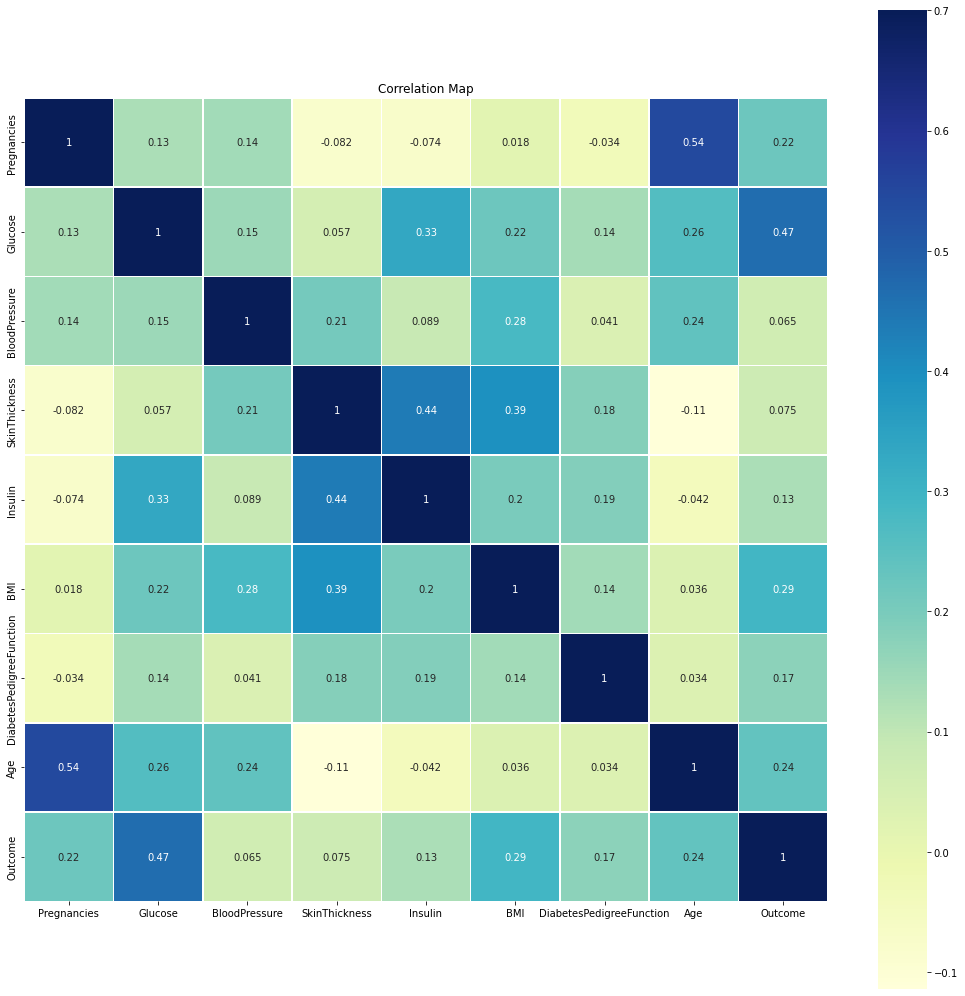

In [37]:
matrix = df.corr()
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(matrix, vmax = .7, square = True, cmap = "YlGnBu", annot= True, linewidth = .5).set_title('Correlation Map')

# Splitting the data into Training Data and Testing Data

In [38]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [39]:
print(X.head())
print("*" * 50)
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
**************************************************
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [41]:
X_train.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33


In [50]:
print("Total number of rows in the dataset:",len(df))
print( "Total number of rows in the Glucose which are zero:", len(df.loc[df['Glucose'] == 0]))
print("Total number of rows in the BloodPressure which are zero: ",len(df.loc[df[ 'BloodPressure' ]==0]))
print( "Total number of rows in the SkinThickness which are zero:" , len(df.loc[df[ 'SkinThickness' ]==0]))
print("Total number of rows in the Insulin which are zero: ",len(df.loc[df[ 'Insulin' ]==0]))
print( "Total number of rows in the BMI which are zero: ",len(df.loc[df[ 'BMI' ] ==0]))
print("Total number of rows in the DiabetesPedigreeFunction which are zero: ",len(df.loc[df[ 'DiabetesPedigreeFunction' ] ==0]))
print("Total number of rows in the Age which are zero: ",len(df.loc[df[ 'Age' ] ==0]))


Total number of rows in the dataset: 768
Total number of rows in the Glucose which are zero: 5
Total number of rows in the BloodPressure which are zero:  35
Total number of rows in the SkinThickness which are zero: 227
Total number of rows in the Insulin which are zero:  374
Total number of rows in the BMI which are zero:  11
Total number of rows in the DiabetesPedigreeFunction which are zero:  0
Total number of rows in the Age which are zero:  0


# Filling zeroes with Mean values

In [51]:
from sklearn.impute import SimpleImputer
fill = SimpleImputer(missing_values = 0, strategy = 'mean')
X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

# Model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn. metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn. metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# 1) Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver= 'lbfgs' ,class_weight= 'balanced', max_iter=10000, random_state=42)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
lrscore = lr.score(X_test,y_test)

In [62]:
y_pred_proba = lr.predict_proba(X_test)[:,1]
[fpr1,tpr1,thr1] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:\n')
print(lr.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred1))
print(lr.__class__.__name__+" log_loss is %2.3f" % log_loss (y_test, y_pred_proba))
print(lr.__class__.__name__+" auc is %2.3f" % auc (fpr1, tpr1) )


Train/Test split results:

LogisticRegression basic accuracy is 0.701
LogisticRegression log_loss is 0.574
LogisticRegression auc is 0.798


# 2) Support Vector Classifier

In [66]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 42)
svc_model.fit(X_train, y_train)
y_pred2 = svc_model.predict(X_test)
SVCscore = svc_model.score(X_test,y_test)
confusion_matrix(y_test,y_pred2)

array([[130,  21],
       [ 41,  39]])

In [68]:
print('Train/Test split result: :\n')
print(svc_model.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred2))

Train/Test split result: :

SVC basic accuracy is 0.732


# 3) Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
y_pred = clf.predict(X_test)
from sklearn import metrics

In [71]:
print("Accuracy of the model: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model:  0.7489177489177489


# 4) Implementing the kNN Classifier with K Neighbours

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Creating a k-NN classifier with 23 neighbors
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(X_train, y_train)

#Printing the accuracy of the model
print(knn.score(X_test,y_test))
print("Accuracy of the model is: {}".format(round(knn.score(X_test, y_test),2) * 100)+"%")

0.7229437229437229
Accuracy of the model is: 72.0%


In [77]:
# setting up arrays to store training and testing accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [78]:
for i, k in enumerate(neighbors):
  #Setting up a k_NN Classifier with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)

  #Fitting the the classifier to train data
  knn.fit(X_train, y_train)

  # Compute accuracy to the training data
  train_accuracy[i] = knn.score(X_train, y_train)

  # COmpute accuracy on the test set
  test_accuracy[i] = knn.score(X_test, y_test)


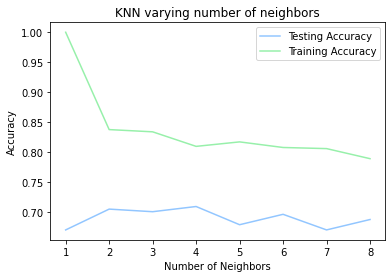

In [81]:
# Generating plot
_ = plt.title('KNN varying number of neighbors')
_ = plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
_ = plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# 5) XG Boost

In [83]:
# XGBoost Classifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from pandas import MultiIndex, Int16Dtype

param_test = {
    'n_estimators' : [10,50,100],
    'max_depth':[3,5,7],
    'min_child_weight':[1,3],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[0.5,0.75,1],
    'colsample_bytree':[0.5,0.75,1],
    'learning_rate':[0.01,0.05,0.1]
}

scoring = {'AUC':'roc_auc','Accuracy': make_scorer(accuracy_score)}

grid_search_xgb = GridSearchCV(estimator = XGBClassifier(eval_metric = 'mlogloss', use_label_encoder = False),
                               param_grid = param_test,
                               scoring = scoring,
                               cv = 5,
                               verbose = 1,
                               refit = 'Accuracy',
                               n_jobs = -1)
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(eval_metric='mlogloss',
                                     use_label_encoder=False),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3],
                         'n_estimators': [10, 50, 100],
                         'subsample': [0.5, 0.75, 1]},
             refit='Accuracy',
             scoring={'AUC': 'roc_auc',
                      'Accuracy': make_scorer(accuracy_score)},
             verbose=1)

In [85]:
# train XGB on Train
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree=0.5,
                     gamma = 0.4,
                     learning_rate = 0.1,
                     max_depth = 3,
                     min_child_weight = 1,
                     n_estimators = 50,
                     subsample = 0.5,
                     random_state = 1,
                     eval_metric = 'mlogloss',
                     use_label_encoder = False,
                     n_jobs = -1)
xgb.fit(X_train,y_train)

# predict on test split
y_pred6 = xgb.predict(X_test)
XGBscore = xgb.score(X_test,y_test)

y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]
[fpr6,tpr6,thr6] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:\n')
print(xgb.__class__.__name__+" basic accuracy is %2.3f" % accuracy_score(y_test, y_pred6))
print(xgb.__class__.__name__+" log_loss is %2.3f" % log_loss (y_test, y_pred_proba_xgb))
print(xgb.__class__.__name__+" auc is %2.3f" % auc (fpr6, tpr6) )


Train/Test split results:

XGBClassifier basic accuracy is 0.740
XGBClassifier log_loss is 0.521
XGBClassifier auc is 0.798


# Algorithm Analysis

In [86]:
from sklearn import ensemble, linear_model, neighbors, svm, tree, model_selection

Model = [
    # Logistic Regression
    lr,

    # Support Vector Classifier
    svc_model,

    # Random Forest Classifier
    clf,

    # XGBoost Classifier
    xgb,

    # k-NN 
    knn
]

In [90]:
# Creating table of algorithm stats

Model_columns = []
Model_compare = pd.DataFrame(columns = Model_columns)

row_index = 0
for alg in Model:
  predicted = alg.fit(X_train, y_train).predict(X_test)
  fp, tp, th = roc_curve(y_test, predicted)
  Model_name = alg.__class__.__name__
  Model_compare.loc[row_index, 'Model Name'] = Model_name
  Model_compare.loc[row_index, 'Model Test Accuracy'] = round(alg.score(X_test, y_test), 4)
  Model_compare.loc[row_index, 'Model Precision'] = precision_score(y_test, predicted)
  Model_compare.loc[row_index, 'Model Recall'] = recall_score(y_test, predicted)
  Model_compare.loc[row_index, 'Model AUC'] = auc(fp, tp)
  row_index += 1
Model_compare.sort_values(by = ['Model Test Accuracy'], ascending = False, inplace = True)
Model_compare


,Model Name,Model Test Accuracy,Model Precision,Model Recall,Model AUC
2,RandomForestClassifier,0.7576,0.639535,0.6875,0.741101
3,XGBClassifier,0.7403,0.621951,0.6375,0.716101
1,SVC,0.7316,0.650000,0.4875,0.674214
0,LogisticRegression,0.7013,0.557895,0.6625,0.692177
4,KNeighborsClassifier,0.6883,0.554054,0.5125,0.646978


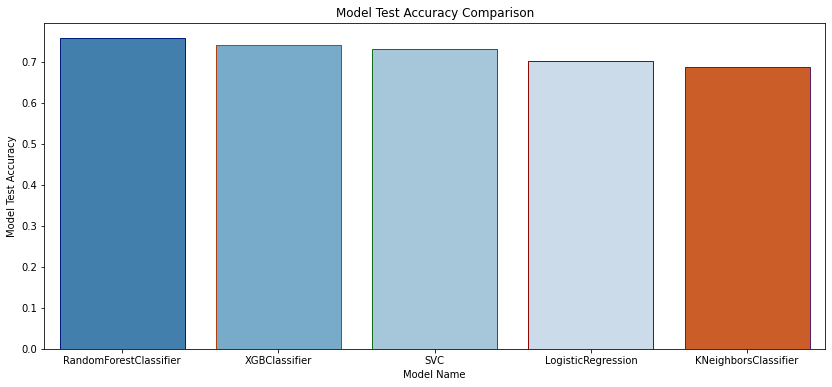

In [91]:
# Model Test Accuracy Comparison

plt.subplots(figsize = (14,6))
sns.barplot(x = "Model Name", y = "Model Test Accuracy", data = Model_compare, palette = 'tab20c', edgecolor = sns.color_palette('dark',7))
plt.xticks()
plt.title('Model Test Accuracy Comparison')
plt.show()